# Final Project ID/X Partners Data Scientist - VIX

## Business Understanding
Tujuan utama dari proyek ini adalah untuk membantu lending company dalam menghadapi tantangan yang berkaitan dengan penilaian credit risk. Dengan menggunakan dataset yang disediakan oleh perusahaan, yang terdiri dari data pinjaman yang diterima dan ditolak sebelumnya, akan dibangun sebuah model prediksi credit risk yang dapat memberikan informasi yang berharga dalam pengambilan keputusan terkait persetujuan pinjaman di masa depan.

## Analytic Approach
Tujuan akhir dari proyek ini adalah untuk memprediksi apakah pelamar kredit berpotensi menjadi risiko tinggi (1) atau rendah (0) berdasarkan informasi yang ada. Langkah awal dari pendekatan analitik ini adalah eksplorasi data dan melakukan preprocessing data. Langkah ini mencakup penanganan nilai-nilai yang hilang, encoding kolom kategorikal, dan penghapusan kolom yang tidak relevan.

Selanjutnya, akan dibangun 2 model dengan menggunakan algoritma Random Forest Classifier dan XGBoost. Random Forest Classifier adalah bentuk ensemble learning yang menggabungkan beberapa pohon keputusan (decision trees) ke dalam sebuah model. Sedangkan XGBoost bekerja dengan cara menggabungkan beberapa model prediksi yang lemah (weak learners), seperti pohon keputusan, ke dalam sebuah model yang kuat. Keduanya mampu mengatasi masalah klasifikasi data yang tidak seimbang, dan memberikan performa yang baik dengan fitur-fitur yang relevan.

Untuk mengevaluasi performa model, akan digunakan dua metrik evaluasi utama, yaitu F1 Score dan Area Under the Precision-Recall Curve (AUC-PR) karena data kemungkinan akan memiliki masalah ketidakseimbangan. Metrik F1 Score memberikan kesimpulan keseluruhan tentang keakuratan model dalam memprediksi kelas minoritas (risiko kredit tinggi). Sementara AUC-PR mengukur sejauh mana model dapat membedakan antara kelas positif dan negatif dengan mempertimbangkan precision dan recall.

## Data Understanding
### Import Libraries

In [1]:
# Load Data & EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling & Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc
import xgboost as xgb

### Load Dataset

In [2]:
path = 'loan_data_2007_2014.csv'
df = pd.read_csv(path)

C:\Users\ASUSROG\AppData\Local\Temp\ipykernel_14420\3453748082.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


### Data Exploration

In [3]:
# Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# Check dataframe shape
df.shape

(466285, 75)

In [5]:
# Check the first 5 rows
pd.pandas.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for data duplicates
df.duplicated().sum()

0

In [7]:
# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0',
    'id',
    'member_id',
    'url',
    'desc',
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_rv_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m'
]

data = df.drop(columns_to_drop, axis=1)

In [8]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_il_24m,total_rev_hi_lim
67599,14500,14500,14500.0,36 months,6.03,441.32,A,A1,SR. QI COORDINATOR,4 years,RENT,60000.0,Verified,Nov-13,Current,n,credit_card,TOTAL CREDIT CARD PAY OFFS,NY,8.88,0.0,Dec-98,0.0,NaN,NaN,6.0,0.0,6932,32.7,14.0,f,3343.49,3343.49,12322.04,12322.04,11156.51,1165.53,0.0,0.0,0.0,Jan-16,441.32,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,6932.0,NaN,21200.0
401072,15000,15000,15000.0,36 months,11.99,498.15,B,B3,Finance Lead,< 1 year,MORTGAGE,210000.0,Verified,Apr-14,Current,n,credit_card,Credit card refinancing,CA,8.60,2.0,Nov-99,3.0,20.0,NaN,13.0,0.0,21522,43.6,34.0,w,7331.95,7331.95,9963.00,9963.00,7668.05,2294.95,0.0,0.0,0.0,Dec-15,498.15,Feb-16,Jan-16,0.0,20.0,1,INDIVIDUAL,0.0,277.0,359955.0,NaN,49400.0
419962,9000,9000,9000.0,36 months,12.99,303.21,B,B5,General Sales Manager,< 1 year,RENT,108000.0,Source Verified,Mar-14,Current,n,major_purchase,Major purchase,CA,8.60,4.0,Sep-88,0.0,14.0,5.0,16.0,4.0,4123,60.6,39.0,f,634.77,634.77,9657.78,9657.78,8365.23,1292.55,0.0,0.0,0.0,Dec-15,803.21,Jan-16,Oct-15,0.0,14.0,1,INDIVIDUAL,0.0,0.0,39644.0,NaN,6800.0
236406,30000,30000,30000.0,60 months,25.57,890.60,F,F5,Signalman,8 years,MORTGAGE,95000.0,Verified,Dec-14,Current,n,debt_consolidation,Debt consolidation,WA,15.77,1.0,Aug-04,1.0,5.0,NaN,9.0,0.0,25395,77.2,23.0,w,26280.25,26280.25,11535.18,11535.18,3719.75,7815.43,0.0,0.0,0.0,Jan-16,890.60,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,267602.0,NaN,32900.0
431372,14400,14400,14400.0,60 months,14.64,339.86,C,C3,PROCUREMENT ANALYST,10+ years,RENT,54800.0,Source Verified,Mar-14,Current,n,debt_consolidation,Debt consolidation,NY,7.38,0.0,Oct-86,0.0,NaN,NaN,7.0,0.0,14063,57.2,10.0,w,10285.44,10285.44,7476.92,7476.92,4114.56,3362.36,0.0,0.0,0.0,Jan-16,339.86,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,14063.0,NaN,24600.0


### Target

In [9]:
# Check the values of 'loan_status'
data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
# Create a new column named 'bad_loan' with 0 or 1 values
bad_loan = [
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

data['bad_loan'] = np.where(data['loan_status'].isin(bad_loan), 1, 0)

In [11]:
data.bad_loan.value_counts()

0    414099
1     52186
Name: bad_loan, dtype: int64

In [12]:
# Drop the 'loan_status' column
data.drop('loan_status', axis=1, inplace=True)

### Visualization

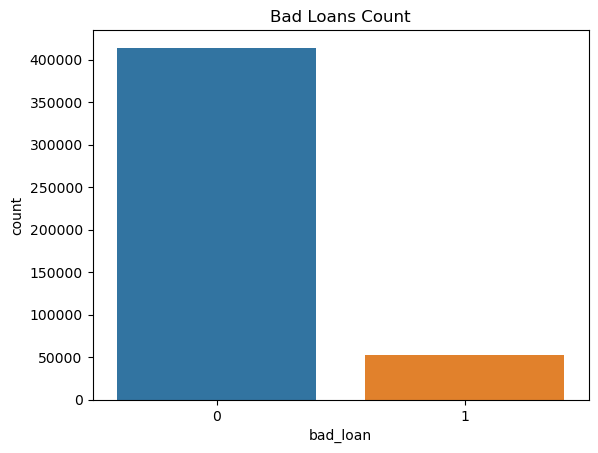

In [13]:
# Visualize the amount of bad_loans with 0 and 1 values, respectively
ax = sns.countplot(x='bad_loan', data=data)
plt.title('Bad Loans Count')
plt.show()

C:\Users\ASUSROG\AppData\Local\Temp\ipykernel_14420\594547999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

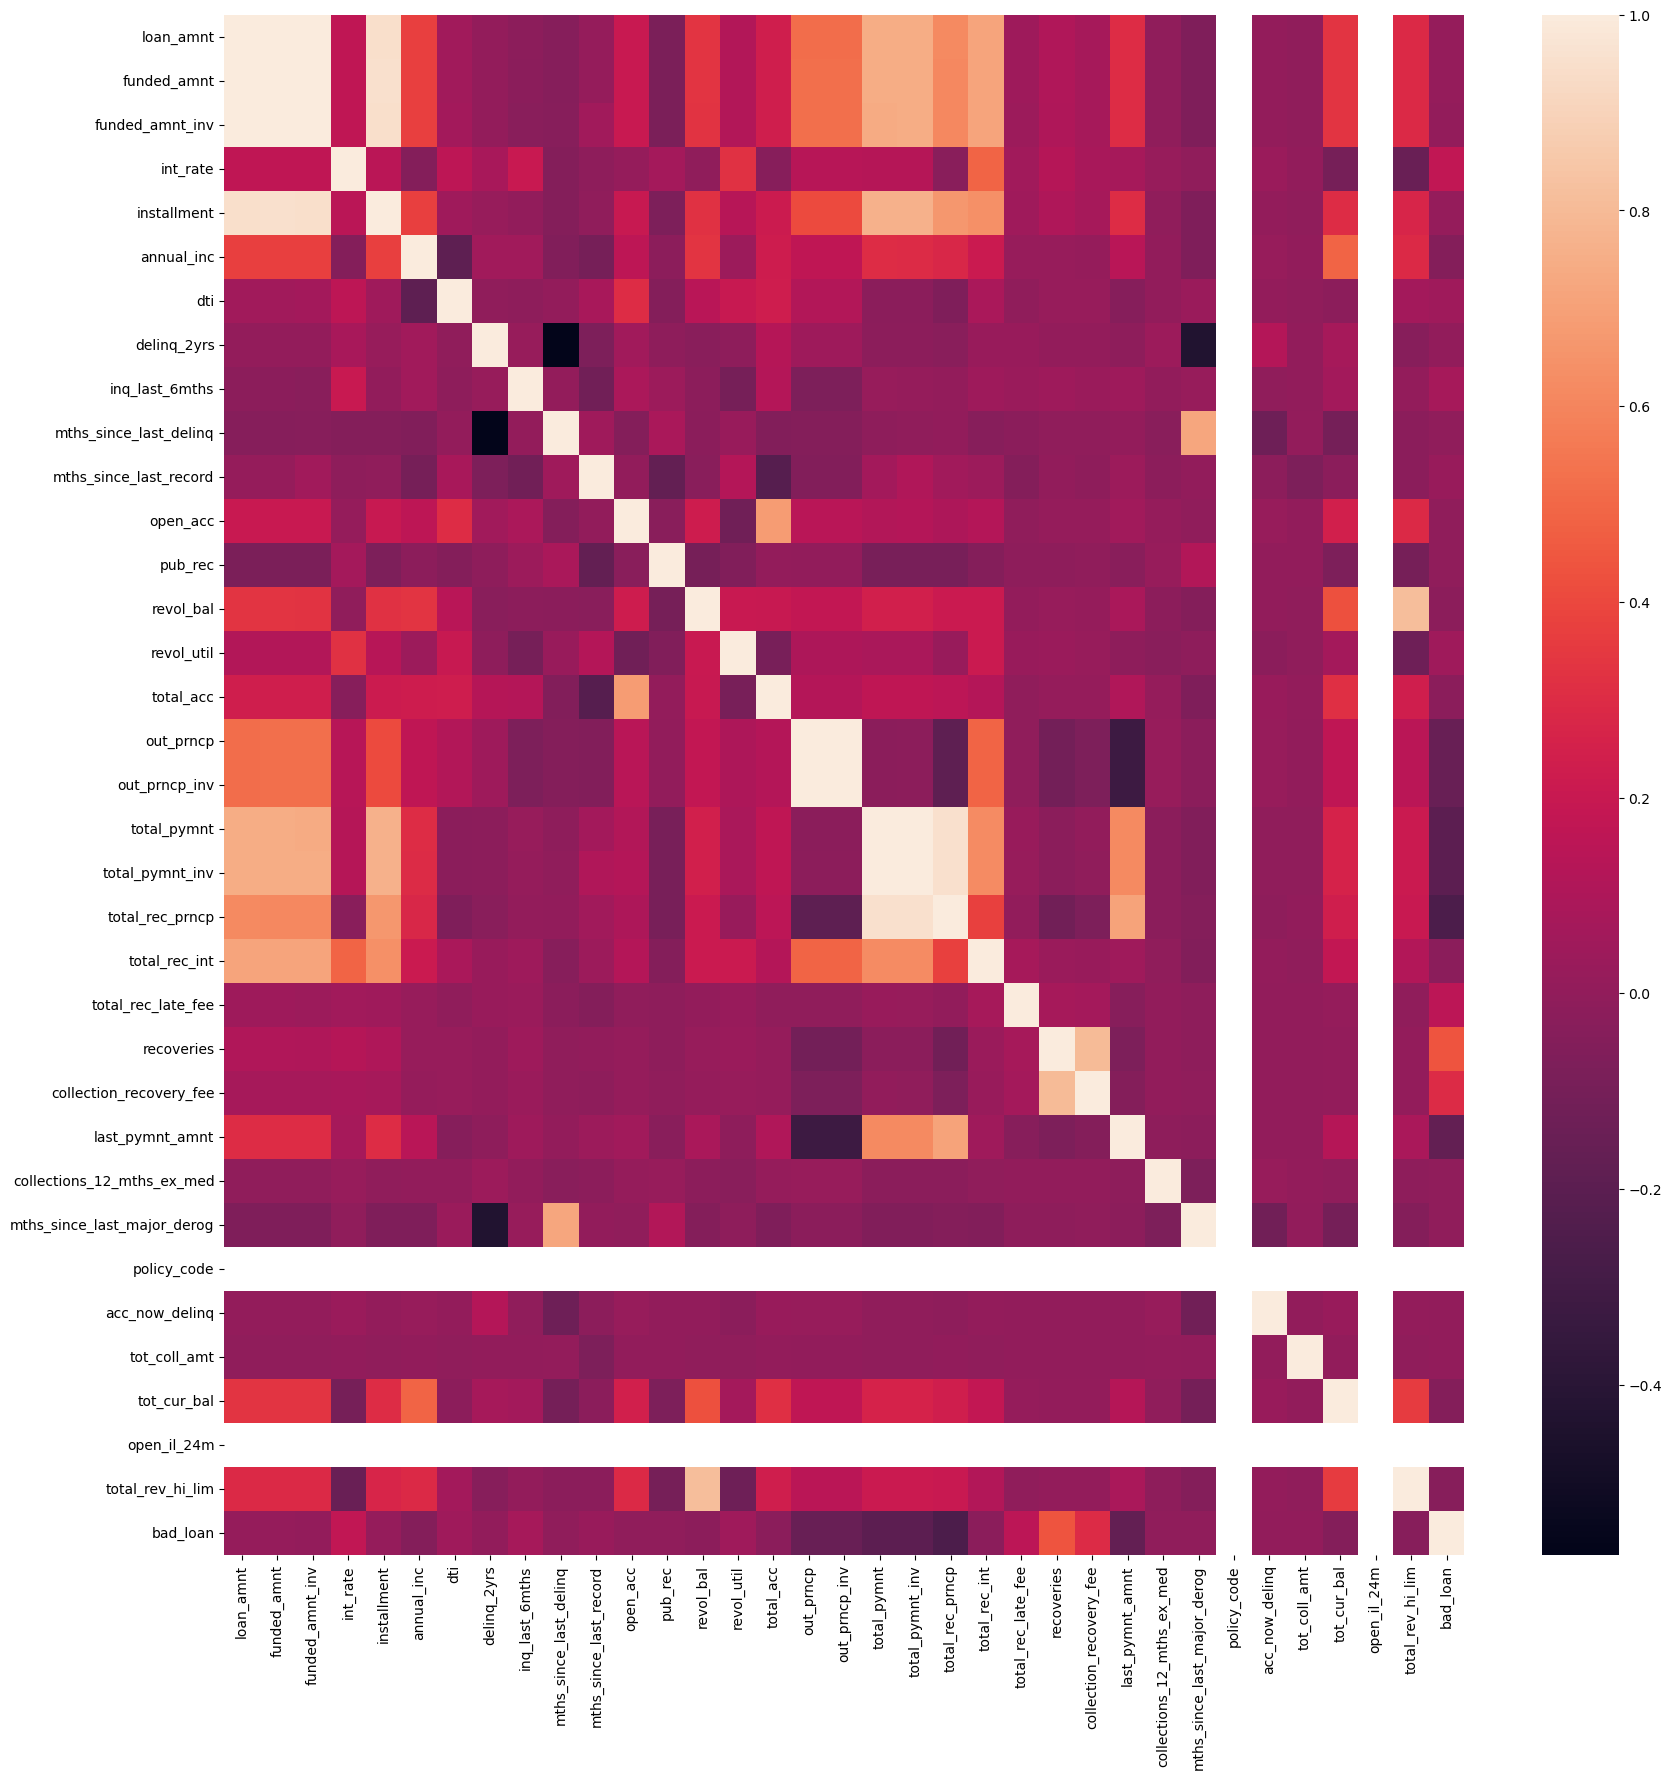

In [14]:
# Visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

## Data Preparation

### Feature Engineering

In [15]:
# Check the number of unique values in columns with object data type
data.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

In [16]:
# Drop unnecessary columns
columns_to_drop = [
    'emp_title',
    'title',
    'application_type',
]

data = data.drop(columns_to_drop, axis=1)

#### emp_length

In [17]:
# Check unique values in the column
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
# Define a mapping of strings to their corresponding numerical values
emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
}

# Convert the 'emp_length' column using the mapping
data['emp_length'] = data['emp_length'].map(emp_length_mapping)

# Convert the 'emp_length' column to float
data['emp_length'] = data['emp_length'].astype(float)

In [19]:
data.emp_length.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

#### issue_d

In [20]:
# Check unique values in the column
data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [21]:
# Convert the 'issue_d' column to datetime data type
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

In [22]:
data.issue_d.unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

#### earliest_cr_line

In [23]:
# Check unique values in the column
data.earliest_cr_line.unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [24]:
# Convert the date strings to datetime data type
def transform_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    year = int(date_str.split('-')[1])
    month = date_str.split('-')[0]
    if year > 23:
        if len(str(year)) == 1:
            transform = pd.to_datetime("{}-190{}".format(month, year), format='%b-%Y')
        else:
            transform = pd.to_datetime("{}-19{}".format(month, year), format='%b-%Y')
    else:
        if len(str(year)) == 1:
            transform = pd.to_datetime("{}-200{}".format(month, year), format='%b-%Y')
        else:
            transform = pd.to_datetime("{}-20{}".format(month, year), format='%b-%Y')
    return transform

# Apply the transformation to each date in the 'earliest_cr_line' column
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: transform_date(x))

In [25]:
data.earliest_cr_line.max()

Timestamp('2011-11-01 00:00:00')

#### last_pymnt_d

In [26]:
# Check unique values in the column
data.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [27]:
# Convert the 'last_pymnt_d' column to datetime data type
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [28]:
data.last_pymnt_d.unique()

array(['2015-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000',                           'NaT',
       '2012-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-04-01

#### next_pymnt_d

In [29]:
# Check unique values in the column
data.next_pymnt_d.unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [30]:
# Convert the 'next_pymnt_d' column to datetime data type
data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')

In [31]:
data.next_pymnt_d.unique()

array([                          'NaT', '2016-02-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2011-08-01

#### last_credit_pull_d

In [32]:
# Check unique values in the column
data.last_credit_pull_d.unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [33]:
# Convert the 'last_credit_pull_d' column to datetime data type
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')

In [34]:
data.last_credit_pull_d.unique()

array(['2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-10-01

### Handling Missing Values

In [35]:
# Check null values
data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc   

In [36]:
# Drop columns with all missing values
data = data.drop(columns=['open_il_24m'])

In [37]:
# Fill missing values in specific columns with mean or median
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['revol_util'].fillna(data['revol_util'].mean(), inplace=True)
data['total_acc'].fillna(data['total_acc'].mean(), inplace=True)
data['last_credit_pull_d'].fillna(data['last_credit_pull_d'].mean(), inplace=True)
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mean(), inplace=True)
data['tot_coll_amt'].fillna(data['tot_coll_amt'].mean(), inplace=True)
data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean(), inplace=True)
data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].mean(), inplace=True)

In [38]:
# Fill specific columns with 0
data['emp_length'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['earliest_cr_line'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(0, inplace=True)
data['mths_since_last_record'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['last_pymnt_d'].fillna(0, inplace=True)
data['next_pymnt_d'].fillna(0, inplace=True)
data['mths_since_last_major_derog'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)

In [39]:
# Check null values
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymn

### One-hot Encoding

In [40]:
# Define columns to be encoded
values_to_encode = [
    'term',
    'grade',
    'sub_grade',
    'home_ownership',
    'verification_status',
    'pymnt_plan',
    'purpose',
    'addr_state',
    'initial_list_status'
]

# Perform one-hot encoding
encoded_data = pd.get_dummies(data[values_to_encode], drop_first=True)

In [41]:
encoded_data

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
466281,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
466282,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466283,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Feature Selection

C:\Users\ASUSROG\AppData\Local\Temp\ipykernel_14420\594547999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

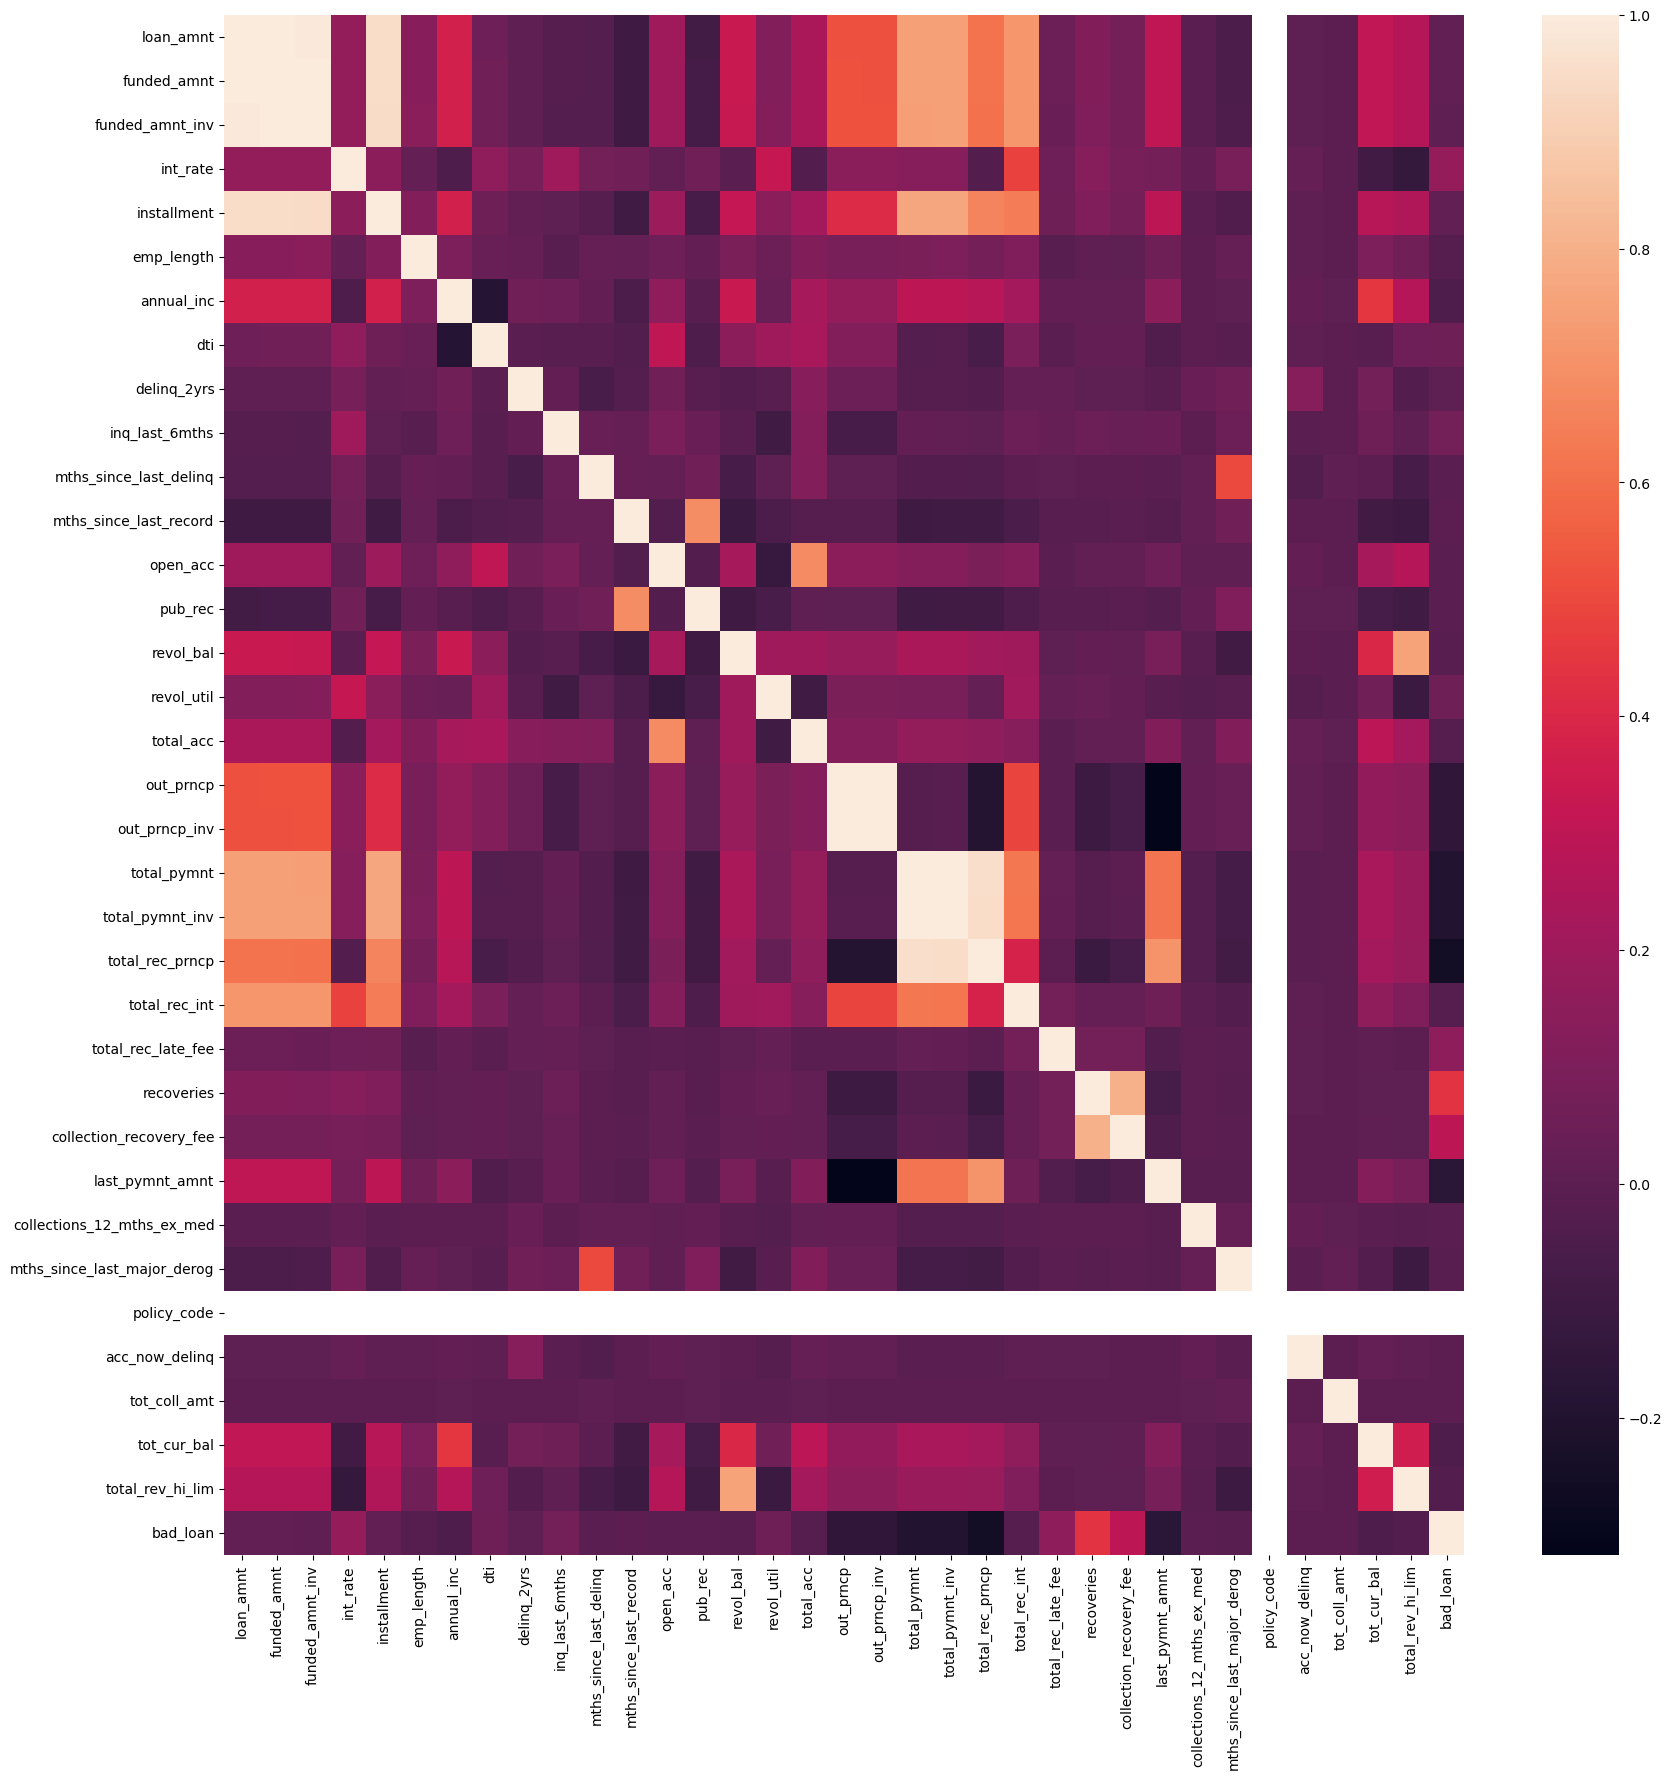

In [42]:
# Visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [43]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Select columns with correlation above threshold
threshold = 0.1
high_correlation_columns = correlation_matrix[abs(correlation_matrix['bad_loan']) > threshold]

# Get the column names of the selected columns
selected_columns = high_correlation_columns.index.tolist()

# Use the selected columns for further analysis or modeling
selected_features = data[selected_columns]

C:\Users\ASUSROG\AppData\Local\Temp\ipykernel_14420\4076357309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [44]:
selected_features

,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loan
0,10.65,0.00,0.00,5861.071414,5831.78,5000.00,0.00,0.00,0.00,171.62,0
1,15.27,0.00,0.00,1008.710000,1008.71,456.46,0.00,117.08,1.11,119.66,1
2,15.96,0.00,0.00,3003.653644,3003.65,2400.00,0.00,0.00,0.00,649.91,0
3,13.49,0.00,0.00,12226.302210,12226.30,10000.00,16.97,0.00,0.00,357.48,0
4,12.69,766.90,766.90,3242.170000,3242.17,2233.10,0.00,0.00,0.00,67.79,0
...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,12574.00,12574.00,10383.360000,10383.36,5826.00,0.00,0.00,0.00,432.64,0
466281,19.97,0.00,0.00,4677.920000,4677.92,1837.04,0.00,0.00,0.00,17.50,1
466282,16.99,14428.31,14428.31,12343.980000,12343.98,6271.69,0.00,0.00,0.00,514.34,0
466283,7.90,0.00,0.00,2126.579838,2126.58,2000.00,0.00,0.00,0.00,1500.68,0


In [45]:
# Define target variable
y = data['bad_loan']

# Combining selected features and one-hot encoded data
X = pd.concat([selected_features, encoded_data], axis=1)

,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,10.65,0.00,0.00,5861.071414,5831.78,5000.00,0.00,0.00,0.00,171.62,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.27,0.00,0.00,1008.710000,1008.71,456.46,0.00,117.08,1.11,119.66,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15.96,0.00,0.00,3003.653644,3003.65,2400.00,0.00,0.00,0.00,649.91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.49,0.00,0.00,12226.302210,12226.30,10000.00,16.97,0.00,0.00,357.48,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12.69,766.90,766.90,3242.170000,3242.17,2233.10,0.00,0.00,0.00,67.79,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,12574.00,12574.00,10383.360000,10383.36,5826.00,0.00,0.00,0.00,432.64,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
# Drop target column in X
X = X.drop(columns=['bad_loan'])
X.sample(3)

,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
287474,9.17,21487.24,21487.24,9340.21,9340.21,6512.76,0.0,0.0,0.0,583.55,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
87291,9.99,1953.73,1953.73,6093.23,6093.23,5046.27,0.0,0.0,0.0,225.84,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262689,11.67,3911.15,3911.15,2773.01,2773.01,2088.85,0.0,0.0,0.0,198.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Standardization

In [47]:
# Defining the scaler
scaler = StandardScaler()

# Fit the scaler to data
scaler.fit(X)

# Transform your data using the StandardScaler
scaled_data = scaler.transform(X)

# Convert data to dataframe
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

In [48]:
X_scaled.sample(3)

,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
337236,0.034598,-0.529872,-0.529775,-1.269719,-1.262907,-1.153167,-0.123464,-0.154549,-0.104824,-0.551314,-0.616225,-0.644785,1.649714,-0.444358,-0.288191,-0.170879,-0.084708,-0.155118,-0.166433,-0.206357,-0.221233,-0.227137,-0.246012,-0.270016,-0.264577,-0.239283,-0.247689,-0.246649,4.173471,-0.233482,-0.223469,-0.207574,-0.194793,-0.181786,-0.176578,-0.159485,-0.140552,-0.137637,-0.12324,-0.114096,-0.105024,-0.092313,-0.080484,-0.07643,-0.066728,-0.057056,-0.048827,-0.042049,-0.035382,-0.030097,-0.028746,-1.011790,-0.010356,-0.01976,-0.313407,1.214090,-0.688639,-0.750672,-0.004393,-0.536307,0.836995,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.112747,-0.086815,-0.153340,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,5.980591,-0.00548,-0.069353,-0.200735,-0.074708,-0.119075,-0.307336,-0.183797,-0.094382,-0.11368,-0.191073,-0.066452,-0.110084,-0.045893,-0.114018,-0.291157,-0.086059,-0.17737,-0.044098,-0.151906,-0.113312,-0.072109,-0.049244,1.362255
168596,-0.842035,1.114609,1.115192,0.770024,0.779671,0.517728,-0.123464,-0.154549,-0.104824,-0.470245,1.622784,1.550905,-0.606166,-0.444358,-0.288191,-0.170879,-0.084708,-0.155118,-0.166433,-0.206357,-0.221233,4.402630,-0.246012,-0.270016,-0.264577,-0.239283,-0.247689,-0.246649,-0.239609,-0.233482,-0.223469,-0.207574,-0.194793,-0.181786,-0.176578,-0.159485,-0.140552,-0.137637,-0.12324,-0.114096,-0.105024,-0.092313,-0.080484,-0.07643,-0.066728,-0.057056,-0.048827,-0.042049,-0.035382,-0.030097,-0.028746,0.988348,-0.010356,-0.01976,-0.313407,-0.823662,-0.688639,1.332140,-0.004393,-0.536307,0.836995,-0.030097,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065,-0.112747,-0.086815,6.521443,-0.425396,-0.146054,-0.125269,-0.055386,-0.052301,-0.269792,-0.182157,-0.073227,-0.00548,-0.005073,-0.203899,-0.119131,-0.095223,-0.098027,-0.109142,-0.155957,-0.155249,-0.002929,-0.159365,-0.133444,-0.127927,-0.051344,-0.054798,-0.167208,-0.0054

### Splitting Dataset

In [49]:
# Split data into 80% train set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((373028, 122), (93257, 122))

## Modeling

In [50]:
# Create an Random Forest Classifier
rfc_classifier = RandomForestClassifier(max_depth=5)

# Train the classifier on the training data
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [51]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Evaluation
### Random Forest Classifier

In [52]:
# Calculate F1 score
y_pred = rfc_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-PR
y_prob = rfc_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
area_under_pr_curve = auc(recall, precision)

# Output result
print("F1 Score: {:.4f}".format(f1))
print("AUC-PR: {:.4f}".format(area_under_pr_curve))

F1 Score: 0.6350
AUC-PR: 0.8221


### XGBoost

In [53]:
# Calculate F1 score
y_pred = xgb_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Calculate AUC-PR
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
area_under_pr_curve = auc(recall, precision)

# Output result
print("F1 Score: {:.4f}".format(f1))
print("AUC-PR: {:.4f}".format(area_under_pr_curve))

F1 Score: 0.9001
AUC-PR: 0.9306


## Kesimpulan
Model Random Forest Classifier dan XGBoost keduanya berhasil menunjukkan performa yang cukup baik dengan hasil evaluasi sebagai berikut:
|       Model        |  F1 Score  | AUC-PR Score |
|:------------------:|:----------:|:------------:|
| Random Forest      |   0.6350   |   0.8221     |
| XGBoost            |   0.9001   |   0.9306     |

* Random Forest Classifier menunjukkan performa yang baik dengan F1 Score sebesar 0.6350 dan AUC-PR sebesar 0.8221. Meskipun performanya cukup baik, masih ada ruang untuk peningkatan dalam mengidentifikasi pelamar berisiko tinggi.

* XGBoost memberikan hasil yang sangat mengesankan dengan F1 Score sebesar 0.9001 dan AUC-PR sebesar 0.9306. Algoritma ini secara signifikan mengungguli Random Forest dalam memprediksi risiko kredit dan mengidentifikasi pelamar dengan akurasi yang lebih tinggi.

* Berdasarkan hasil evaluasi, XGBoost adalah pilihan terbaik untuk model prediksi risiko kredit. Algoritma ini menunjukkan performa yang sangat baik dengan F1 Score dan AUC-PR yang keduanya mencapai 90%.

* Belum dilakukan proses hyperparameter tuning untuk kedua model. Dengan demikian, masih ada potensi untuk meningkatkan kinerja keduanya melalui tuning hyperparameter. Selain itu, strategi penanganan ketidakseimbangan kelas seperti oversampling, undersampling, atau menggunakan metode bobot kelas (class weights) juga dapat lebih membantu meningkatkan kinerja model dalam menghadapi data yang tidak seimbang.